# Attacks by Attack Type

Here we have one data point per attack and attack type.

In [1]:
import json
import os
import tarfile

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import datetime
from matplotlib import ticker
from pandas.plotting import register_matplotlib_converters

from IPython.display import display


register_matplotlib_converters()

%matplotlib inline

plt.style.use("seaborn")

In [2]:
data_directory = os.path.join("..", "..", "data")

## Use the same colors for attack types across plots

In [3]:
attack_type_colors = sns.color_palette("pastel", 3)

attack_type_palette = {
    "displacement": attack_type_colors[0],
    "insertion": attack_type_colors[1],
    "suppression": attack_type_colors[2],
}

## Plot axis formatters

In [4]:
thousands_formatter = ticker.FuncFormatter(lambda value, position: "{:d}K".format(int(value / 1000)))

## Attack stats for displacement

Keep only the variables shared with other attacks (cost and profit).

In [5]:
df_displacement = pd.read_csv(os.path.join(data_directory, "displacement_attacks.csv"))
df_displacement = df_displacement[["Cost", "Profit"]]
df_displacement.describe().style.format("{:.2f}")

,Cost,Profit
count,2983.00,2983.00
mean,14.28,1537.99
std,18.25,7162.80
min,0.01,0.00
25%,4.36,1.14
50%,9.48,158.53
75%,16.64,851.04
max,311.69,223150.01


## Attack stats for insertion

Keep only the variables shared with other attacks (cost and profit).

In [6]:
df_insertion = pd.read_csv(os.path.join(data_directory, "insertion_attacks.csv"))
df_insertion = df_insertion[["Cost", "Profit"]]
df_insertion.describe().style.format("{:.2f}")

,Cost,Profit
count,196691.00,196691.00
mean,19.41,65.05
std,51.15,233.44
min,0.01,-10620.61
25%,4.09,7.86
50%,7.74,24.07
75%,15.23,62.92
max,1822.22,20084.01


## Attack stats for suppression

Keep only the variables shared with other attacks (cost and profit).

In [7]:
df_suppression = pd.read_csv(os.path.join(data_directory, "suppression_attacks.csv"))
df_suppression = df_suppression[["Cost", "Profit"]]
df_suppression.describe().style.format("{:.2f}")

,Cost,Profit
count,50.00,50.00
mean,2349.65,20725.24
std,3331.21,113598.58
min,4.67,-10741.12
25%,221.87,-1893.26
50%,896.68,-284.81
75%,2719.69,-14.93
max,10741.12,791211.86


## Add all together

Displacement and insertion have too many datapoints for the following plots, so we take a sample of each:

In [8]:
df_displacement["Type"] = "displacement"
df_insertion["Type"] = "insertion"
df_suppression["Type"] = "suppression"

n_samples = len(df_suppression)

df = pd.concat((
    df_displacement.sample(n=n_samples),
    df_insertion.sample(n=n_samples),
    df_suppression,
), axis=0)

In [9]:
pd.DataFrame(df.groupby("Type")["Type"].count().rename("Count"))

,Count
Type,
displacement,50
insertion,50
suppression,50


## Profit distribution by attack type

Plotting profit distributions per attack type is not very useful because of the long tails and the huge amount of density around zero for insertion:

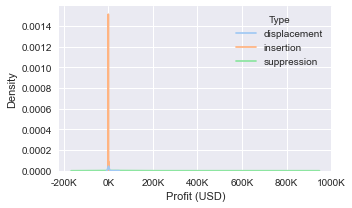

In [10]:
plt.figure(figsize=(5, 3))
ax = sns.kdeplot(
    x="Profit",
    hue="Type",
    data=df,
    palette=attack_type_palette)
plt.xlabel("Profit (USD)")
ax.xaxis.set_major_formatter(thousands_formatter)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, "profit_distribution.pdf"), dpi=1000)
plt.show()

And the profit distributions per attack type using log scale are not very intuitive:

- The notion of meaning in the x axis is lost.
- At least we still see that insertion is less disperse than the others.
- Also that displacement has two modes.
- And suppression seems to be more in the positive side than the others.
- It also shows an error because some profits are too close to zero.

c:\users\camino\documents\repos\front-running\venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


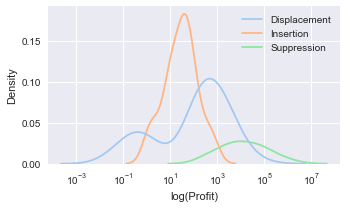

In [11]:
plt.figure(figsize=(5, 3))
g = sns.kdeplot(
    x="Profit",
    hue="Type",
    data=df,
    palette=attack_type_palette,
    log_scale=True)

g.legend_.set_title(None)
g.legend_.texts[0].set_text("Displacement")
g.legend_.texts[1].set_text("Insertion")
g.legend_.texts[2].set_text("Suppression")

plt.xlabel("log(Profit)")
plt.tight_layout()
plt.savefig(os.path.join(data_directory, "log_profit_distribution.pdf"), dpi=1000)
plt.show()

Box plots look terrible too, but at least we can see outliers (a lot more for suppression than the others):

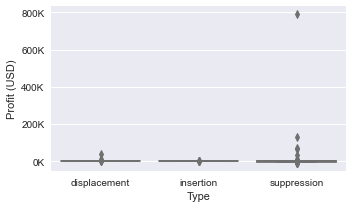

In [12]:
plt.figure(figsize=(5, 3))
ax = sns.boxplot(
    y="Profit",
    x="Type",
    data=df,
    palette=attack_type_palette)
plt.ylabel("Profit (USD)")
ax.yaxis.set_major_formatter(thousands_formatter)
plt.tight_layout()
plt.show()

## Cost distribution by attack type

The same happens for the cost:

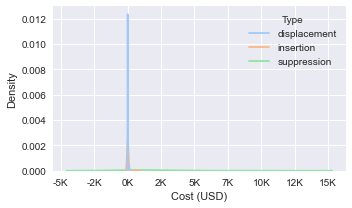

In [13]:
plt.figure(figsize=(5, 3))
ax = sns.kdeplot(
    x="Cost",
    hue="Type",
    data=df,
    palette=attack_type_palette)
plt.xlabel("Cost (USD)")
ax.xaxis.set_major_formatter(thousands_formatter)
plt.tight_layout()
plt.savefig(os.path.join(data_directory, "cost_distribution.pdf"), dpi=1000)
plt.show()

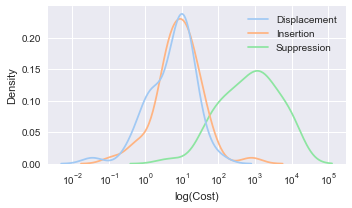

In [14]:
plt.figure(figsize=(5, 3))
g = sns.kdeplot(
    x="Cost",
    hue="Type",
    data=df,
    palette=attack_type_palette,
    log_scale=True)

g.legend_.set_title(None)
g.legend_.texts[0].set_text("Displacement")
g.legend_.texts[1].set_text("Insertion")
g.legend_.texts[2].set_text("Suppression")

plt.xlabel("log(Cost)")
plt.tight_layout()
plt.savefig(os.path.join(data_directory, "log_cost_distribution.pdf"), dpi=1000)
plt.show()

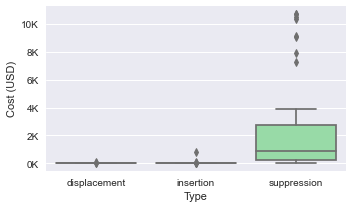

In [15]:
plt.figure(figsize=(5, 3))
ax = sns.boxplot(
    y="Cost",
    x="Type",
    data=df,
    palette=attack_type_palette)
ax.yaxis.set_major_formatter(thousands_formatter)
plt.ylabel("Cost (USD)")
plt.tight_layout()
plt.show()

## Cost and profit by attack type

Using scatter plots to see both distrubutions and their correlation might be better but the outliers ruin the plot again.

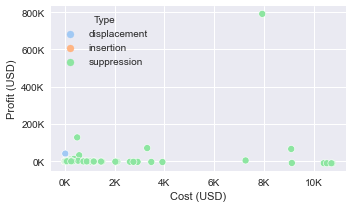

In [16]:
plt.figure(figsize=(5, 3))
ax = sns.scatterplot(
    x="Cost",
    y="Profit",
    hue="Type",
    data=df,
    palette=attack_type_palette)
ax.xaxis.set_major_formatter(thousands_formatter)
ax.yaxis.set_major_formatter(thousands_formatter)
plt.xlabel("Cost (USD)")
plt.ylabel("Profit (USD)")
plt.tight_layout()
plt.show()

After trying with different bounds, we cut cost > 200 and profit > 5000 to see what remains.

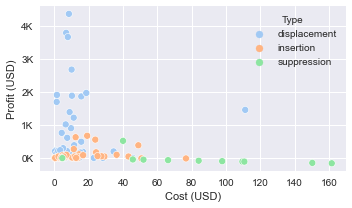

In [17]:
mask = (df["Cost"] < 200) & (df["Profit"] < 5000)

plt.figure(figsize=(5, 3))
ax = sns.scatterplot(
    x="Cost",
    y="Profit",
    hue="Type",
    data=df[mask],
    palette=attack_type_palette)
ax.yaxis.set_major_formatter(thousands_formatter)
plt.xlabel("Cost (USD)")
plt.ylabel("Profit (USD)")
plt.tight_layout()
plt.show()